0 → setosa

1 → versicolor

2 → virginica

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [75]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [77]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

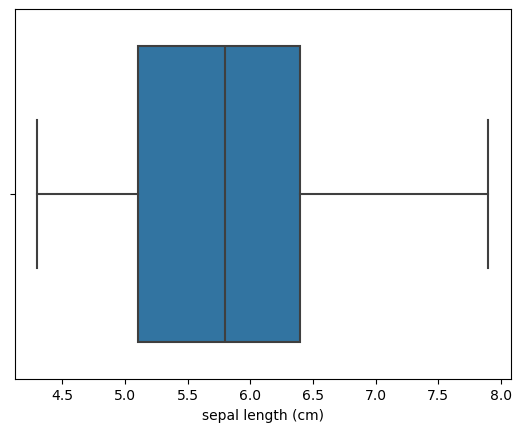

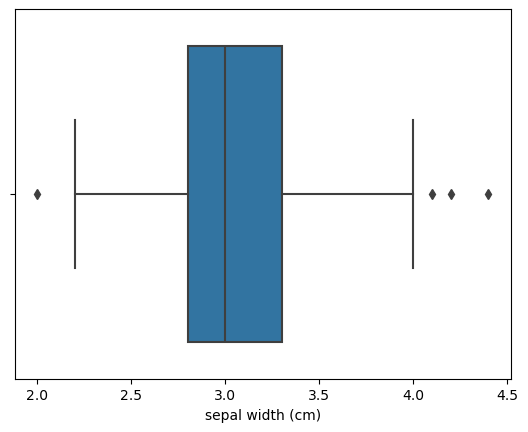

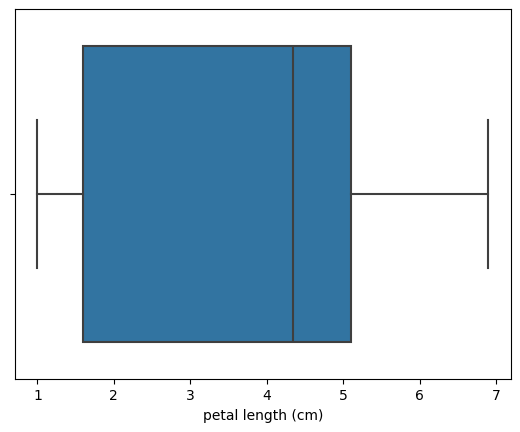

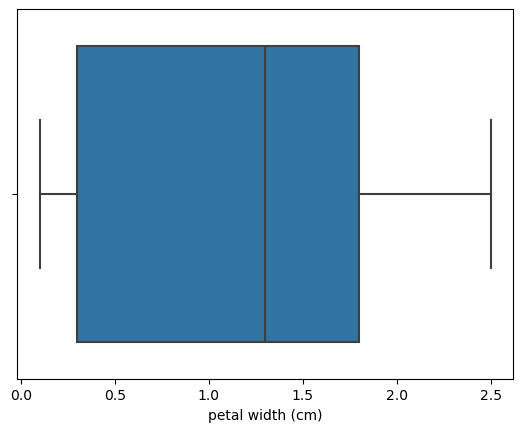

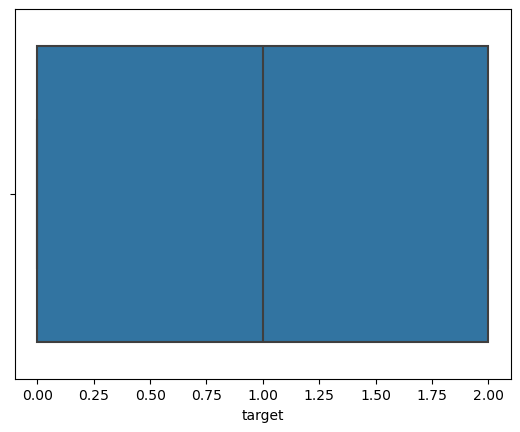

In [78]:
for col in df.columns:
    sns.boxplot(data=df, x=col)
    plt.show()

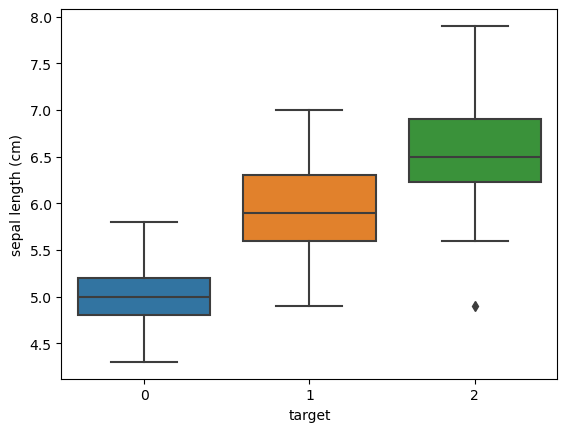

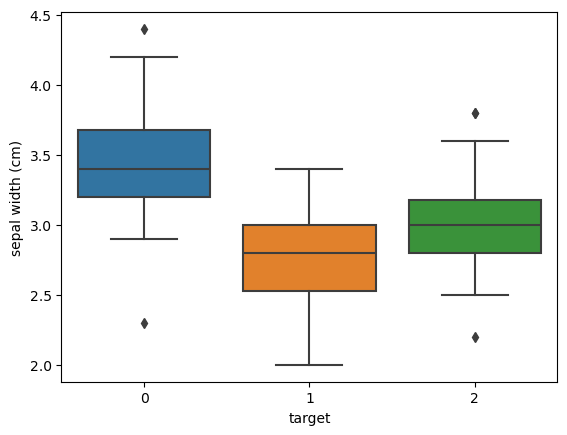

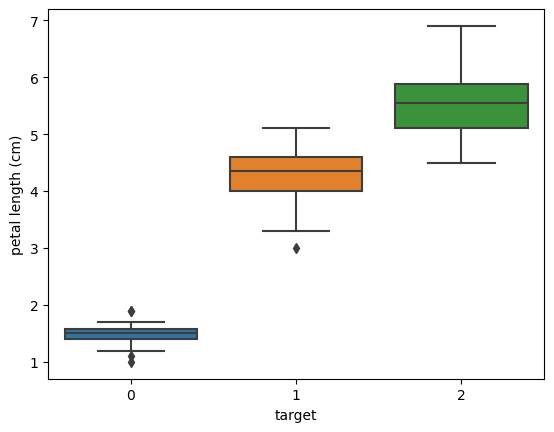

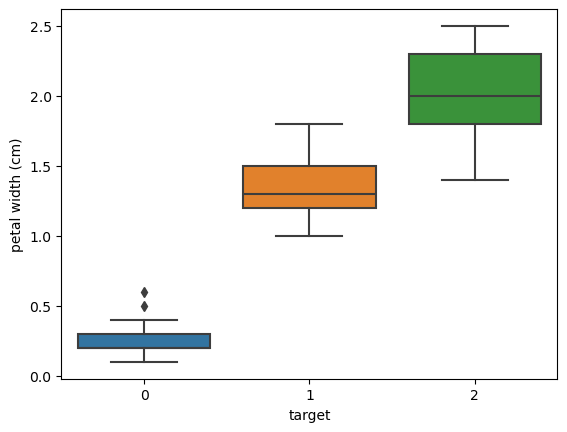

In [79]:
for col in df.columns:
    if col != 'target':
        sns.boxplot(data=df, y=col, x = df.target)
        plt.show()

In [80]:
y = df['target']
X = df.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=26)

In [81]:
model = RandomForestClassifier(n_estimators = 50, random_state = 26)

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      1.00      0.96        12
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



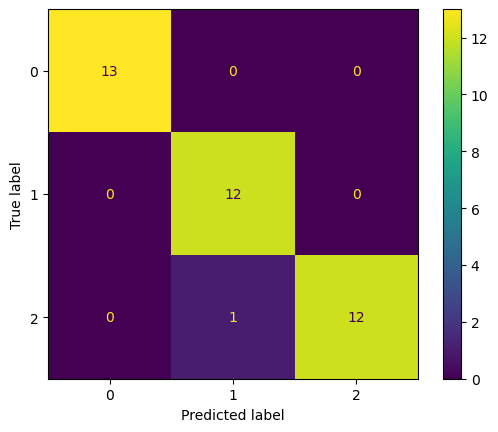

In [83]:
cm=confusion_matrix(y_test, pred, labels=model.classes_)
fig =ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig.plot()

In [110]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10)
for idx, i in enumerate(scores):
    print(f'CV{idx+1} score: {i:.2f}')

CV1 score: 1.00
CV2 score: 0.93
CV3 score: 1.00
CV4 score: 0.93
CV5 score: 0.93
CV6 score: 0.93
CV7 score: 0.80
CV8 score: 0.93
CV9 score: 1.00
CV10 score: 1.00
